In [ ]:
# # Lab | Cleaning numerical data

# For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder.

# ## Context

# An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy is, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

# **Some business Objectives**:

# - Retain customers,
# - Analyze relevant customer data,
# - Develop focused customer retention programs.

# Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

# ### Instructions

# 1. Import the necessary libraries.
# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
# 3. First look at its main features (head, shape, info).
# 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
# 5. Change effective to date column to datetime format.
# 6. Define a function that differentiates between continuous and discrete variables. 
#   Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df
# 7. Plot a correlation matrix, comment what you see.
# 8. Create a function to plot every discrete variable.  Do the same with the continuous variables 
#   (Be Careful, you may need to change the plot type to one better suited for continuous data!)
# 9. Comment what you can see in the plots.
# 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
# 11. Did you find outliers?  Comment what you will do with them.
# 12. Check all columns for NaN values.  Decide what (if anything) you will need to do with them.

In [3]:
# 1.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [24]:
# 2.
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [27]:
# 4. 
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [28]:
# 5.
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

In [29]:
data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [67]:

df_num = data.select_dtypes(np.number)
df_cat = data.select_dtypes(include=['object', 'datetime64'])


In [68]:
def cont(df):

    disc_df = df_num.select_dtypes('int')
    cont_df = df.select_dtypes('float')

    disc_list = []
    cont_list = []
    
    for col in df:
        
        if (df[col].nunique() < (df_num['income'].nunique()/10)) & (df[col].dtypes == 'int64'):
            disc_list.append(col)
        
        else:
            cont_list.append(col)
    
    
    disc_df = pd.DataFrame(df_num[disc_list])
    cont_df = pd.DataFrame(df_num[cont_list]) 
                    

    return disc_df, cont_df

In [70]:
disc_cust, cont_cust = cont(df_num)

In [71]:
disc_cust

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


In [72]:
cont_cust

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [77]:
# 7.
correlations_matrix = df_num.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


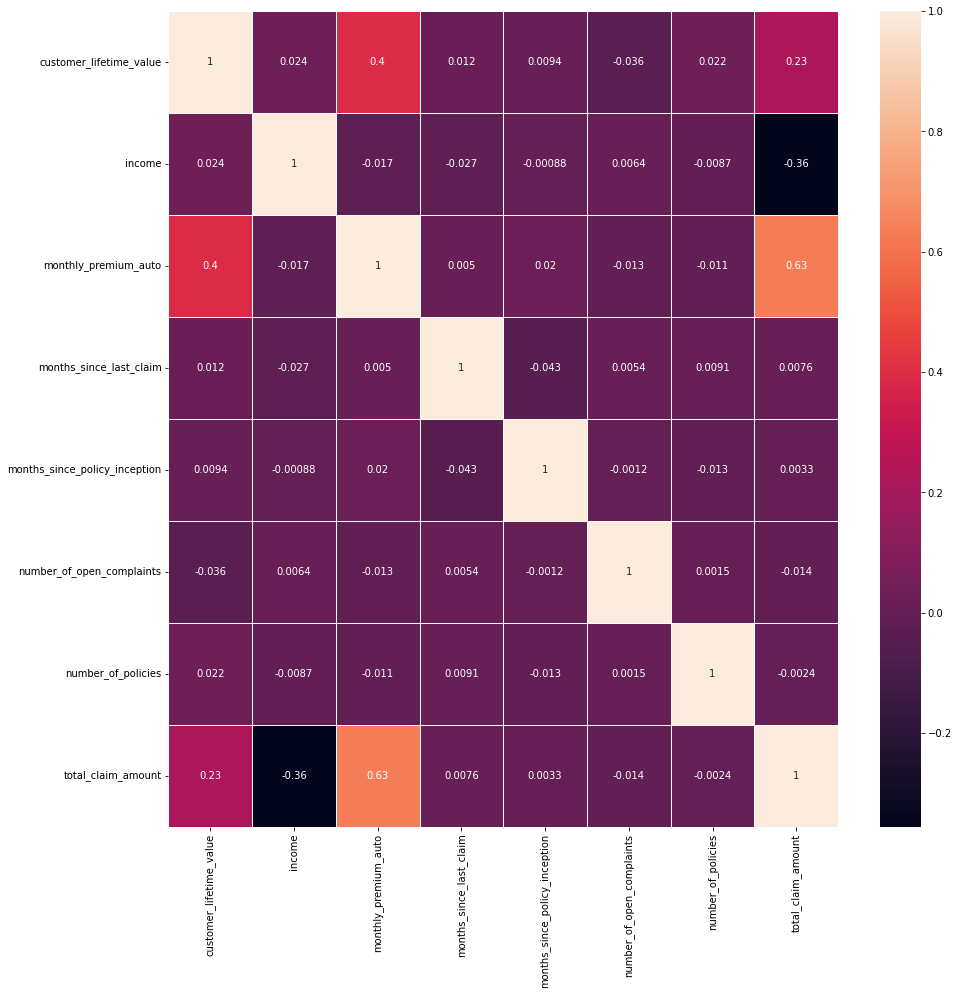

In [79]:
correlations_matrix = df_num.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

# high correlation between monthly_premium_auto and total_calim_amount

In [91]:
# 8.
def plotter (df):
    for col in df:
        sns.distplot(df[col], bins=60)
        plt.show()

C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


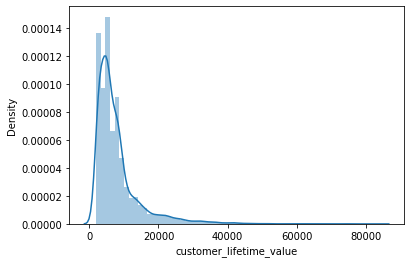

C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


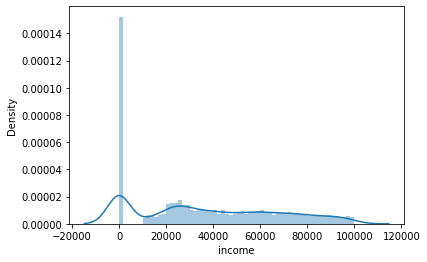

C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


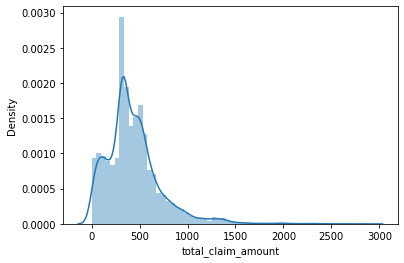

In [92]:
plotter (cont_cust)

In [99]:
def plotter2 (df):
    for col in df:
        sns.histplot(df[col], bins=60)
        plt.show()

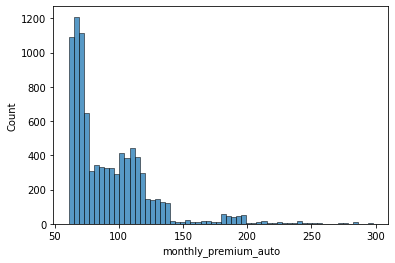

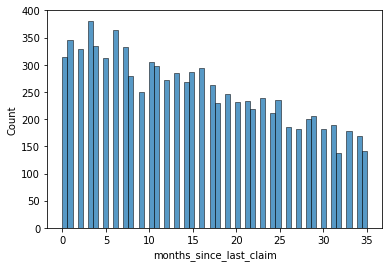

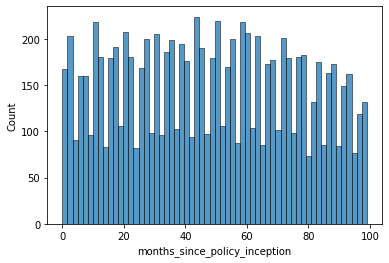

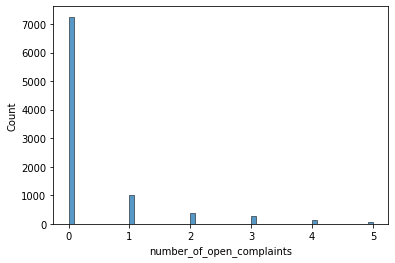

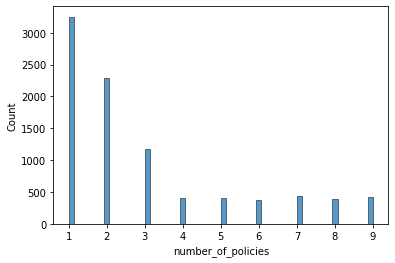

In [100]:
plotter2 (disc_cust)

In [ ]:
# 9. 
# there is a high number of incomes with 0
# monthly_premium_auto, number_of_policies, number_of_open_complaints, customer_claim_amount, total_claim_amount, customer_life_time_value and income are not eaqualy distributed

In [103]:
# 10.
def plotter3 (df):
    for col in df:
        sns.boxplot(x=df[col])
        plt.show()

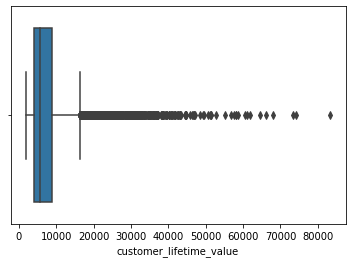

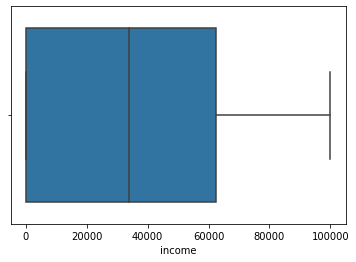

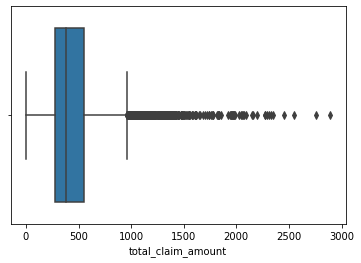

In [104]:
plotter3 (cont_cust)

In [ ]:
# 11.
# There are Outliers in total_claim_amount and customer_lifetime_value. total_claim_amount is the target column so we leave it like it is.
# for the customer_lifetime_value we could build bins (5 - 10).

In [105]:
# 12.
data.isnull().sum()/len(data)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [ ]:
# if there would be NaN I would use the KNeighborsClassifier als long it makes sense (for total_claim_amount for example it's not useful)